In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as ln
from termcolor import colored

In [2]:
def bar_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data,edgecolor='black')
    ax.set_xlabel(name)
    ax.set_ylabel('frecuencia ni')
    ax.set_title(f'Diagrama de barras {name}')
    plt.show()

In [2]:
def outlier_data(x,date):
    plt.figure(figsize=(10,5))
    fig = date.boxplot(column=x)
    plt.show()

In [3]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(data[x], bins=m, edgecolor='black')
    plt.ylabel('Frecuencia Absoluta ni')
    plt.xlabel(name)
    plt.title(f"Histograma de {name}")
    plt.subplot(122)
    plt.hist(data[x], bins=m, edgecolor='black', cumulative=True, histtype='step')
    plt.ylabel('Freacuencia Relativa Acumulada Fi')
    plt.xlabel(name)
    plt.title(f"Diagrama de Ojiva de {name}")
    plt.show()

In [4]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

In [5]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

In [6]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

In [7]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic    

In [8]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

# Preparación de los datos

#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Maligna/Benigna)


In [11]:
# Importamos el conjunto de datos
data = pd.read_csv('./dataC.csv')
data.head()

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,Id_Cryptocurrency
0,234,38-csves/4.csv,2,TCP,NaN,NaN,285.35925,285.3865,285.41375,570.773,...,NaN,17.25,17.5,17.75,3665.75,6866.5,10067.25,mine,Bitcash,2
1,1171,602-csves/1.csv,145,TCP,UDP,NaN,0.00000,0.0320,45.09200,3319.648,...,80.0,1.00,2.0,10.00,37.00,64.0,1555.00,not_mine,NaN,0
2,1893,971-csves/0.csv,176,TCP,UDP,NaN,0.00000,0.0000,13.33525,1790.951,...,80.0,1.00,1.0,3.00,32.00,64.0,132.75,not_mine,NaN,0
3,79,13-csves/1.csv,2,TCP,NaN,NaN,196.18225,196.1895,196.19675,392.379,...,NaN,10.50,11.0,11.50,2679.50,5159.0,7638.50,mine,Bitcoin,1
4,412,211-csves/1.csv,57,TCP,UDP,NaN,89.52900,148.0000,180.00700,6699.510,...,80.0,4.00,5.0,7.00,100.00,192.0,280.00,not_mine,NaN,0


In [12]:
# Initial information at data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 34 columns):
index                4733 non-null int64
Name                 4733 non-null object
Netflows             4733 non-null int64
First_Protocol       4733 non-null object
Second_Protocol      2272 non-null object
Third_Protocol       129 non-null object
p1_d                 4733 non-null float64
p2_d                 4733 non-null float64
p3_d                 4733 non-null float64
duration             4733 non-null float64
max_d                4733 non-null float64
min_d                4733 non-null float64
#packets             4733 non-null int64
Avg_bps              4733 non-null int64
Avg_pps              4733 non-null int64
Avg_bpp              4733 non-null int64
#Bytes               4733 non-null int64
#sp                  4733 non-null int64
#dp                  4733 non-null int64
first_sp             4733 non-null int64
second_sp            4701 non-null float64
third_sp       

In [23]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 4733 registros y 34 columnas


### Inspección datos nulos

In [17]:
avaliable = data.notnull()
avaliable.apply(pd.Series.value_counts).T

,False,True
index,NaN,4733.0
Name,NaN,4733.0
Netflows,NaN,4733.0
First_Protocol,NaN,4733.0
Second_Protocol,2461.0,2272.0
Third_Protocol,4604.0,129.0
p1_d,NaN,4733.0
p2_d,NaN,4733.0
p3_d,NaN,4733.0
duration,NaN,4733.0


### Estructuración del conjunto de datos
Agrupo las columnas de tipo int64, float64 y object por separado, para hacer una analisis mas organizado

In [19]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [20]:
data_numeric_int

['index',
 'Netflows',
 '#packets',
 'Avg_bps',
 'Avg_pps',
 'Avg_bpp',
 '#Bytes',
 '#sp',
 '#dp',
 'first_sp',
 'first_dp',
 'Id_Cryptocurrency']

Variables cuantitativas continuas

In [24]:
print(data_numeric_float)

['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'second_sp', 'third_sp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']


Variables categoricas

In [25]:
print(data_object)

['Name', 'First_Protocol', 'Second_Protocol', 'Third_Protocol', 'Type', 'Cryptocurrency']


# Inspección de datos no agrupados

In [26]:
#Datos categoricos
data[data_object].describe().T

,count,unique,top,freq
Name,4733,3433,7-csves/1.csv,6
First_Protocol,4733,4,TCP,4227
Second_Protocol,2272,4,UDP,1996
Third_Protocol,129,3,ICMP6,92
Type,4733,2,not_mine,2501
Cryptocurrency,2232,5,Etherium,959


No tengo en cuenta a 'Name', ya que solo hace referencia a los nombres de las ventanas de tiempo. La moda(top) indica que hay elementos con el mismo nombre, dado que concatenamos varios registros de diferentes conjuntos de datos, pero no significa que los registros sean repetidos.

In [27]:
#Datos Continuos
data[data_numeric_float].describe().T

,count,mean,std,min,25%,50%,75%,max
p1_d,4733.0,133.499145,190.475068,0.0,0.000,13.9345,247.59925,599.533
p2_d,4733.0,148.935284,185.152649,0.0,0.813,58.3345,248.31300,599.533
p3_d,4733.0,169.899109,176.883018,0.0,37.342,96.0300,251.91275,599.533
duration,4733.0,3857.288985,7896.290798,0.0,524.756,1055.2150,3830.02700,100119.108
max_d,4733.0,205.818681,162.263467,0.0,88.019,159.9850,275.62500,599.533
min_d,4733.0,121.916729,194.930279,0.0,0.000,0.0000,247.45600,599.533
second_sp,4701.0,21597.080621,25984.317006,0.0,80.000,3337.0000,52745.00000,64790.000
third_sp,2562.0,17074.018345,23311.218295,0.0,80.000,123.0000,41946.50000,65093.000
second_dp,4701.0,20807.808551,25652.426386,53.0,80.000,3337.0000,52220.00000,64790.000
third_dp,2564.0,9397.637676,18634.583671,53.0,80.000,443.0000,1900.00000,60989.000


In [28]:
# Datos discretos
data[data_numeric_int].describe().T

,count,mean,std,min,25%,50%,75%,max
index,4733.0,8.054984e+02,7.259007e+02,0.0,198.0,546.0,1317.0,2500.0
Netflows,4733.0,9.824128e+01,1.915744e+02,1.0,2.0,23.0,110.0,3313.0
#packets,4733.0,2.673519e+03,7.140684e+03,1.0,54.0,332.0,5107.0,198794.0
Avg_bps,4733.0,8.216193e+04,2.251706e+05,0.0,491.0,1279.0,125428.0,7161568.0
Avg_pps,4733.0,1.402240e+01,3.577477e+01,0.0,0.0,1.0,19.0,1333.0
Avg_bpp,4733.0,3.760038e+02,2.990786e+02,0.0,133.0,313.0,634.0,1356.0
#Bytes,4733.0,2.024831e+06,7.010679e+06,33.0,15504.0,40328.0,4578769.0,261143006.0
#sp,4733.0,3.677139e+01,6.248541e+01,1.0,2.0,8.0,47.0,745.0
#dp,4733.0,3.529939e+01,6.154510e+01,1.0,2.0,8.0,43.0,740.0
first_sp,4733.0,9.954266e+03,1.951551e+04,0.0,443.0,443.0,4444.0,64790.0


# Análisis datos Agrupados

### Datos categoricos

In [30]:
data_object_list = ['First_Protocol', 'Second_Protocol', 'Third_Protocol', 'Type', 'Cryptocurrency']
tables_frequency_cualitative = []
namess = ['Primer protocolo','Segundo protocolo','Tercer protocolo','Tipo', 'Criptomonedas']
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

Tabla de frecuencia Primer protocolo
  Primer protocolo    ni       fi    Ni       Fi
0              TCP  4227  0.89309  4227  0.89309
1              UDP   504  0.10649  4731  0.99958
2             ICMP     1  0.00021  4732  0.99979
3            ICMP6     1  0.00021  4733        1
5            Total  4733                        


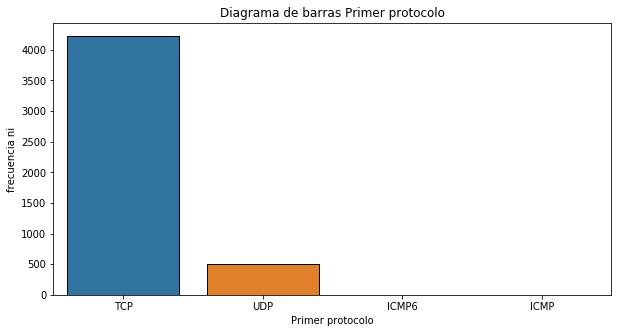

TCP      4227
UDP       504
ICMP6       1
ICMP        1
Name: First_Protocol, dtype: int64
El protocolo con mas observaciones en el conjunto de datos es el TCP con 4227 registros.


In [32]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
print(tables_frequency_cualitative[0])
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Segundo protocolo
  Segundo protocolo    ni       fi    Ni       Fi
0               NaN  2461  0.51997  2461  0.51997
1               UDP  1996  0.42172  4457  0.94169
2              ICMP   267  0.05641  4724   0.9981
3               TCP     6  0.00127  4730  0.99937
4             ICMP6     3  0.00063  4733        1
6             Total  4733                        


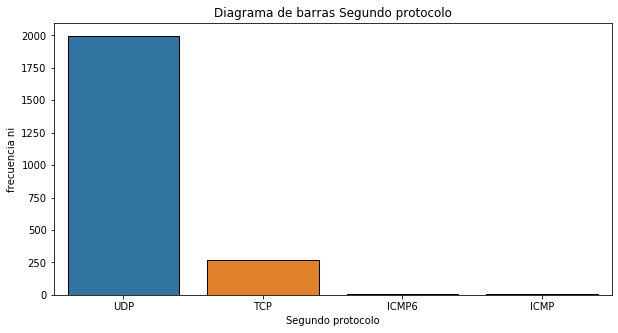

UDP      1996
TCP       267
ICMP6       6
ICMP        3
Name: Second_Protocol, dtype: int64
El protocolo con mas observaciones en el conjunto de datos es el UDP con 1996 registros.


In [33]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
print(tables_frequency_cualitative[1])
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Tercer protocolo
  Tercer protocolo    ni       fi    Ni       Fi
0              NaN  4604  0.97274  4604  0.97274
1            ICMP6    92  0.01944  4696  0.99218
2              TCP    35  0.00739  4731  0.99957
3             ICMP     2  0.00042  4733  0.99999
5            Total  4733                        


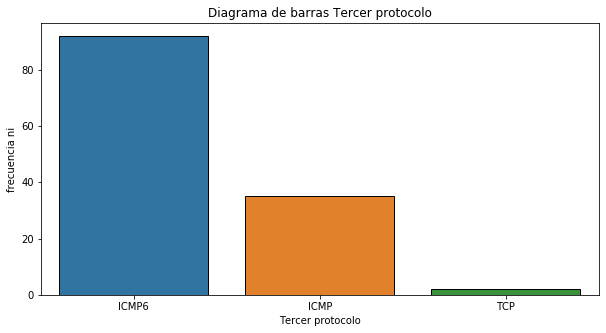

ICMP6    92
ICMP     35
TCP       2
Name: Third_Protocol, dtype: int64
El protocolo con mas observaciones en el conjunto de datos es el ICMP6 con 92 registros.


In [34]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
print(tables_frequency_cualitative[2])
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Tipo
       Tipo    ni       fi    Ni       Fi
0      mine  2501  0.52842  2501  0.52842
1  not_mine  2232  0.47158  4733        1
3     Total  4733                        


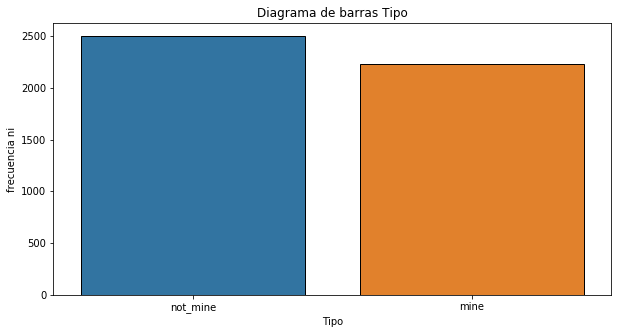

not_mine    2501
mine        2232
Name: Type, dtype: int64
El protocolo con mas observaciones en el conjunto de datos es el not_mine con 2501 registros.


In [35]:
print(colored(f'Tabla de frecuencia {namess[3]}',attrs=['bold']))
print(tables_frequency_cualitative[3])
bar_plot(data_object_list[3],namess[3])
v = data[data_object_list[3]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Criptomonedas
  Criptomonedas    ni       fi    Ni       Fi
0       Bitcash  2501  0.52842  2501  0.52842
1           NaN   959  0.20262  3460  0.73104
2       Bitcoin   485  0.10247  3945  0.83351
3      Etherium   349  0.07374  4294  0.90725
4      Litecoin   247  0.05219  4541  0.95944
5        Monero   192  0.04057  4733  1.00001
7         Total  4733                        


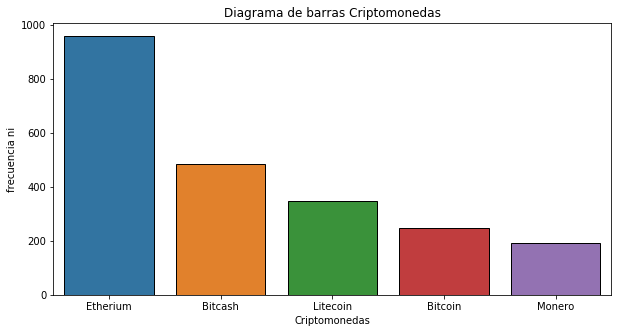

Etherium    959
Bitcash     485
Litecoin    349
Bitcoin     247
Monero      192
Name: Cryptocurrency, dtype: int64
El protocolo con mas observaciones en el conjunto de datos es el Etherium con 959 registros.


In [36]:
print(colored(f'Tabla de frecuencia {namess[4]}',attrs=['bold']))
print(tables_frequency_cualitative[4])
bar_plot(data_object_list[4],namess[4])
v = data[data_object_list[4]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

In [38]:
data_numeric_float

['p1_d',
 'p2_d',
 'p3_d',
 'duration',
 'max_d',
 'min_d',
 'second_sp',
 'third_sp',
 'second_dp',
 'third_dp',
 'p1_ip',
 'p2_ip',
 'p3_ip',
 'p1_ib',
 'p2_ib',
 'p3_ib']

In [39]:
data_numeric_float_list = data_numeric_float
name = ['Percentil 1 duración ventana','Percentil 2 duración ventana','Percentil 3 duración ventana','Duración ventana','Máximo duración','Mínimo duración','Top 2 de los puertos origen','Top 3 de los puertos origen','Top 1 de los puertos destino','Top 2 de los puertos destino','Percentil 1 entradas paquetes', 'Percentil 2 entradas paquetes', 'Percentil 3 entradas paquetes', 'Percentil 1 entradas bytes','Percentil 2 entradas bytes','Percentil 3 entradas bytes']
tables_frequency = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency.append(made_frequency_table_A(i, data,1, name[j]))

In [40]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

12

Tabla de frecuencia de Percentil 1 duración ventana
   Percentil 1 duración ventana    ni          fi    Ni        Fi       Xí
0               (0.0, 49.96108)  2771    0.585464  2771  0.585464  24.9805
1          (49.96108, 99.92216)   301    0.063596  3072   0.64906  74.9416
2         (99.92216, 149.88324)   138    0.029157  3210  0.678217  124.903
3        (149.88324, 199.84432)    95   0.0200718  3305  0.698289  174.864
4         (199.84432, 249.8054)   262    0.055356  3567  0.753645  224.825
5         (249.8054, 299.76648)   441   0.0931756  4008   0.84682  274.786
6        (299.76648, 349.72756)    61   0.0128882  4069  0.859708  324.747
7        (349.72756, 399.68864)    41  0.00866258  4110  0.868371  374.708
8        (399.68864, 449.64972)    36  0.00760617  4146  0.875977  424.669
9         (449.64972, 499.6108)    38  0.00802873  4184  0.884006   474.63
10        (499.6108, 549.57188)   201   0.0424678  4385  0.926474  524.591
11         (549.57188, 599.533)   348   0.073526

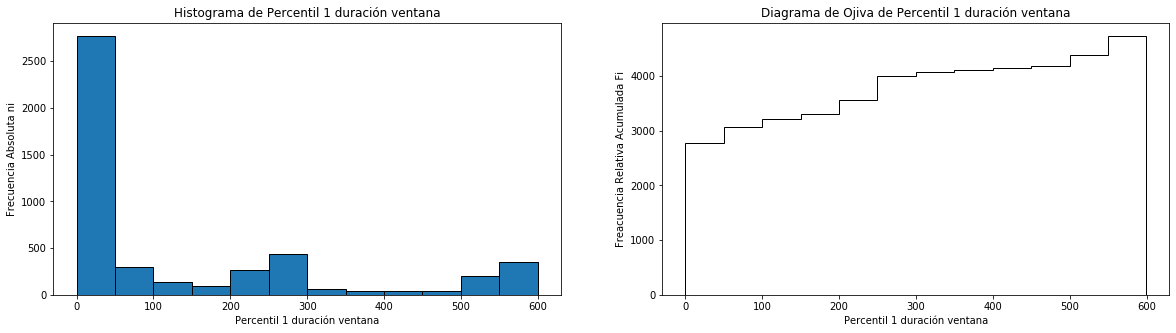

In [53]:
print(colored(f'Tabla de frecuencia de {name[0]}',attrs=['bold']))
print(tables_frequency[0])
hist_Ogive_plot(data_numeric_float_list[0],m,name[0])

Tabla de frecuencia de Percentil 2 duración ventana
   Percentil 2 duración ventana    ni          fi    Ni        Fi       Xí
0               (0.0, 49.96108)  2283    0.482358  2283  0.482358  24.9805
1          (49.96108, 99.92216)   463   0.0978238  2746  0.580182  74.9416
2         (99.92216, 149.88324)   303   0.0640186  3049    0.6442  124.903
3        (149.88324, 199.84432)   192   0.0405662  3241  0.684767  174.864
4         (199.84432, 249.8054)   323   0.0682442  3564  0.753011  224.825
5         (249.8054, 299.76648)   444   0.0938094  4008   0.84682  274.786
6        (299.76648, 349.72756)    56   0.0118318  4064  0.858652  324.747
7        (349.72756, 399.68864)    39  0.00824002  4103  0.866892  374.708
8        (399.68864, 449.64972)    41  0.00866258  4144  0.875555  424.669
9         (449.64972, 499.6108)    38  0.00802873  4182  0.883583   474.63
10        (499.6108, 549.57188)   203   0.0428903  4385  0.926474  524.591
11         (549.57188, 599.533)   348   0.073526

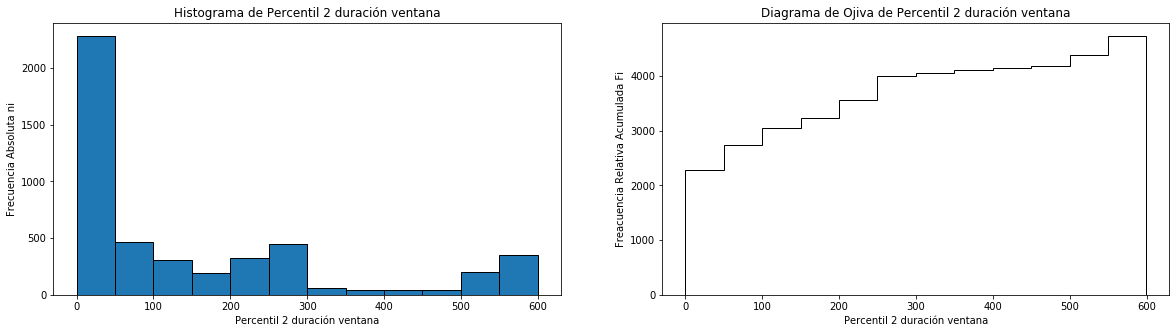

In [52]:
print(colored(f'Tabla de frecuencia de {name[1]}',attrs=['bold']))
print(tables_frequency[1])
hist_Ogive_plot(data_numeric_float_list[1],m,name[1])

Tabla de frecuencia de Percentil 3 duración ventana
   Percentil 3 duración ventana    ni          fi    Ni        Fi       Xí
0               (0.0, 49.96108)  1692     0.35749  1692   0.35749  24.9805
1          (49.96108, 99.92216)   688    0.145362  2380  0.502852  74.9416
2         (99.92216, 149.88324)   447   0.0944433  2827  0.597296  124.903
3        (149.88324, 199.84432)   233   0.0492288  3060  0.646524  174.864
4         (199.84432, 249.8054)   473   0.0999366  3533  0.746461  224.825
5         (249.8054, 299.76648)   471   0.0995141  4004  0.845975  274.786
6        (299.76648, 349.72756)    57   0.0120431  4061  0.858018  324.747
7        (349.72756, 399.68864)    40   0.0084513  4101  0.866469  374.708
8        (399.68864, 449.64972)    34   0.0071836  4135  0.873653  424.669
9         (449.64972, 499.6108)    43  0.00908515  4178  0.882738   474.63
10        (499.6108, 549.57188)   207   0.0437355  4385  0.926474  524.591
11         (549.57188, 599.533)   348   0.073526

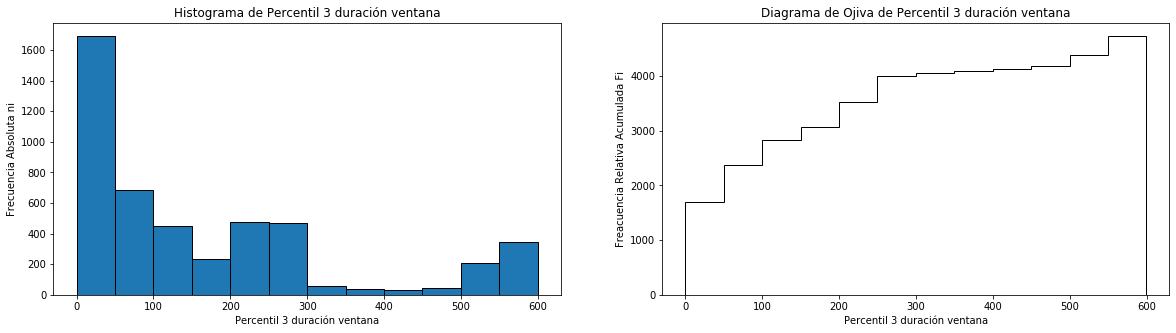

In [51]:
print(colored(f'Tabla de frecuencia de {name[2]}',attrs=['bold']))
print(tables_frequency[2])
hist_Ogive_plot(data_numeric_float_list[2],m,name[2])

Tabla de frecuencia de Duración ventana
                   Duración ventana    ni           fi    Ni        Fi  \
0                   (0.0, 8343.259)  4141     0.874921  4141  0.874921   
1             (8343.259, 16686.518)   356    0.0752166  4497  0.950137   
2            (16686.518, 25029.777)   113    0.0238749  4610  0.974012   
3            (25029.777, 33373.036)    46   0.00971899  4656  0.983731   
4            (33373.036, 41716.295)    30   0.00633847  4686   0.99007   
5            (41716.295, 50059.554)    18   0.00380308  4704  0.993873   
6            (50059.554, 58402.813)    15   0.00316924  4719  0.997042   
7            (58402.813, 66746.072)     6   0.00126769  4725   0.99831   
8            (66746.072, 75089.331)     2  0.000422565  4727  0.998732   
9             (75089.331, 83432.59)     1  0.000211282  4728  0.998944   
10            (83432.59, 91775.849)     3  0.000633847  4731  0.999577   
11  (91775.849, 100119.10800000001)     2  0.000422565  4733         1  

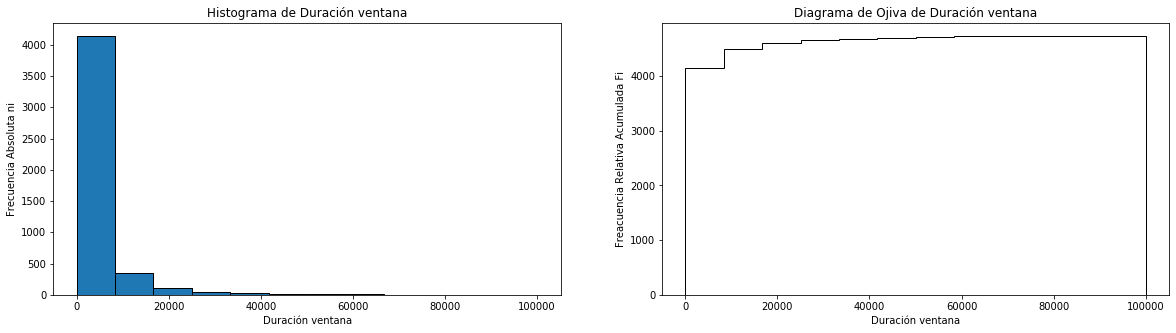

In [50]:
print(colored(f'Tabla de frecuencia de {name[3]}',attrs=['bold']))
print(tables_frequency[3])
hist_Ogive_plot(data_numeric_float_list[3],m,name[3])

Tabla de frecuencia de Máximo duración
           Máximo duración    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)   590    0.124657   590  0.124657  24.9805
1     (49.96108, 99.92216)   852    0.180013  1442  0.304669  74.9416
2    (99.92216, 149.88324)   839    0.177266  2281  0.481935  124.903
3   (149.88324, 199.84432)   424   0.0895838  2705  0.571519  174.864
4    (199.84432, 249.8054)   544    0.114938  3249  0.686457  224.825
5    (249.8054, 299.76648)   744    0.157194  3993  0.843651  274.786
6   (299.76648, 349.72756)    64   0.0135221  4057  0.857173  324.747
7   (349.72756, 399.68864)    44  0.00929643  4101  0.866469  374.708
8   (399.68864, 449.64972)    31  0.00654976  4132  0.873019  424.669
9    (449.64972, 499.6108)    38  0.00802873  4170  0.881048   474.63
10   (499.6108, 549.57188)   207   0.0437355  4377  0.924783  524.591
11    (549.57188, 599.533)   356   0.0752166  4733         1  574.552
12                   Total  4733                   

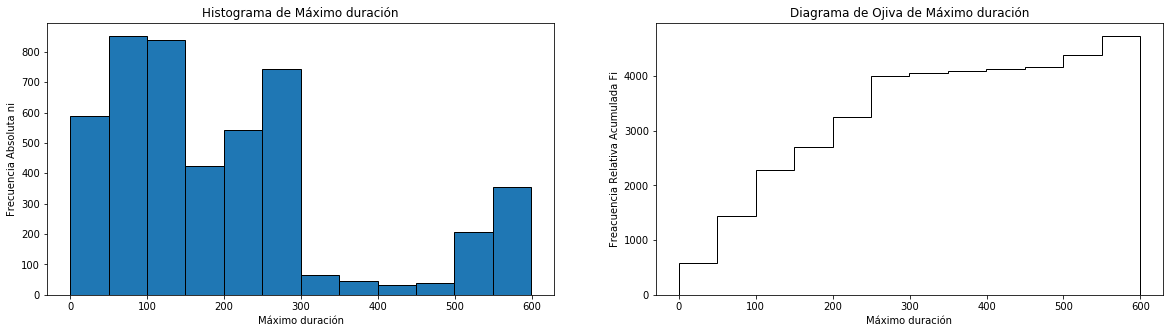

In [49]:
print(colored(f'Tabla de frecuencia de {name[4]}',attrs=['bold']))
print(tables_frequency[4])
hist_Ogive_plot(data_numeric_float_list[4],m,name[4])

Tabla de frecuencia de Mínimo duración
           Mínimo duración    ni          fi    Ni        Fi       Xí
0          (0.0, 49.96108)  3194    0.674836  3194  0.674836  24.9805
1     (49.96108, 99.92216)    48   0.0101416  3242  0.684978  74.9416
2    (99.92216, 149.88324)    32  0.00676104  3274  0.691739  124.903
3   (149.88324, 199.84432)    35  0.00739489  3309  0.699134  174.864
4    (199.84432, 249.8054)   259   0.0547222  3568  0.753856  224.825
5    (249.8054, 299.76648)   450   0.0950771  4018  0.848933  274.786
6   (299.76648, 349.72756)    56   0.0118318  4074  0.860765  324.747
7   (349.72756, 399.68864)    38  0.00802873  4112  0.868794  374.708
8   (399.68864, 449.64972)    34   0.0071836  4146  0.875977  424.669
9    (449.64972, 499.6108)    38  0.00802873  4184  0.884006   474.63
10   (499.6108, 549.57188)   202   0.0426791  4386  0.926685  524.591
11    (549.57188, 599.533)   347    0.073315  4733         1  574.552
12                   Total  4733                   

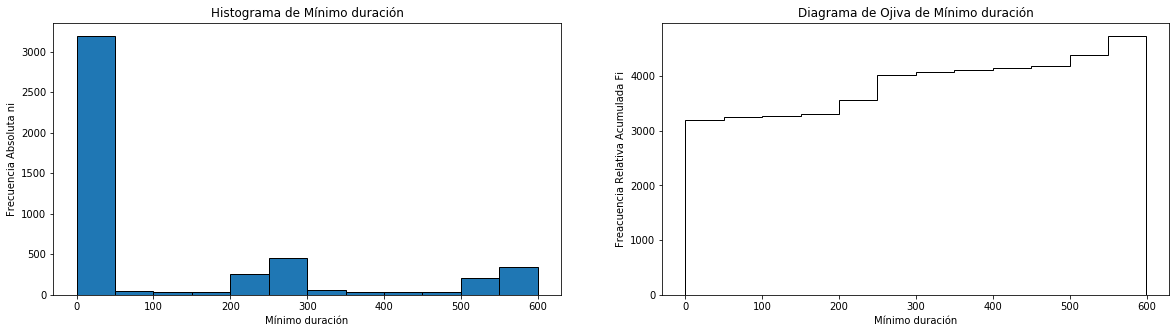

In [48]:
print(colored(f'Tabla de frecuencia de {name[5]}',attrs=['bold']))
print(tables_frequency[5])
hist_Ogive_plot(data_numeric_float_list[5],m,name[5])

In [ ]:
print(colored(f'Tabla de frecuencia de {name[6]}',attrs=['bold']))
print(tables_frequency[6])
hist_Ogive_plot(data_numeric_float_list[6],m,name[5])

In [ ]:
print(colored(f'Tabla de frecuencia de {name[7]}',attrs=['bold']))
print(tables_frequency[7])
hist_Ogive_plot(data_numeric_float_list[7],m,name[7])

Tabla de frecuencia de Top 1 de los puertos destino
   Top 1 de los puertos destino    ni          fi    Ni        Fi       Xí
0               (53.0, 5447.75)  2825    0.600936  2825  0.600936  2750.38
1            (5447.75, 10842.5)     0           0  2825  0.600936  8145.12
2           (10842.5, 16237.25)   190   0.0404169  3015  0.641353  13539.9
3           (16237.25, 21632.0)     0           0  3015  0.641353  18934.6
4           (21632.0, 27026.75)     0           0  3015  0.641353  24329.4
5           (27026.75, 32421.5)     0           0  3015  0.641353  29724.1
6           (32421.5, 37816.25)    39  0.00829611  3054  0.649649  35118.9
7           (37816.25, 43211.0)    40  0.00850883  3094  0.658158  40513.6
8           (43211.0, 48605.75)    41  0.00872155  3135  0.666879  45908.4
9           (48605.75, 54000.5)   568    0.120825  3703  0.787705  51303.1
10          (54000.5, 59395.25)   902    0.191874  4605  0.979579  56697.9
11          (59395.25, 64790.0)    96   0.020421

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


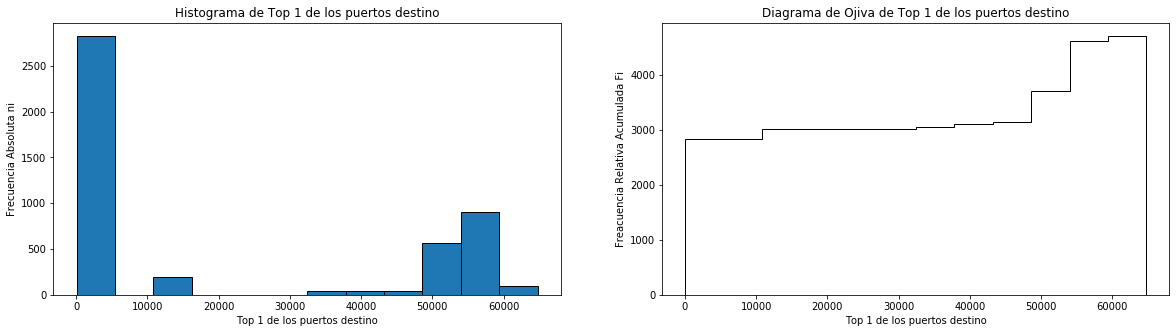

In [54]:
print(colored(f'Tabla de frecuencia de {name[8]}',attrs=['bold']))
print(tables_frequency[8])
hist_Ogive_plot(data_numeric_float_list[8],m,name[8])

Tabla de frecuencia de Top 2 de los puertos destino
   Top 2 de los puertos destino    ni         fi    Ni        Fi     Xí
0                (53.0, 5131.0)  2047   0.798362  2047  0.798362   2592
1             (5131.0, 10209.0)    60  0.0234009  2107  0.821763   7670
2            (10209.0, 15287.0)     0          0  2107  0.821763  12748
3            (15287.0, 20365.0)     0          0  2107  0.821763  17826
4            (20365.0, 25443.0)     0          0  2107  0.821763  22904
5            (25443.0, 30521.0)     0          0  2107  0.821763  27982
6            (30521.0, 35599.0)    32  0.0124805  2139  0.834243  33060
7            (35599.0, 40677.0)    65   0.025351  2204  0.859594  38138
8            (40677.0, 45755.0)    51  0.0198908  2255  0.879485  43216
9            (45755.0, 50833.0)    63   0.024571  2318  0.904056  48294
10           (50833.0, 55911.0)   159  0.0620125  2477  0.966069  53372
11           (55911.0, 60989.0)    87  0.0339314  2564         1  58450
12          

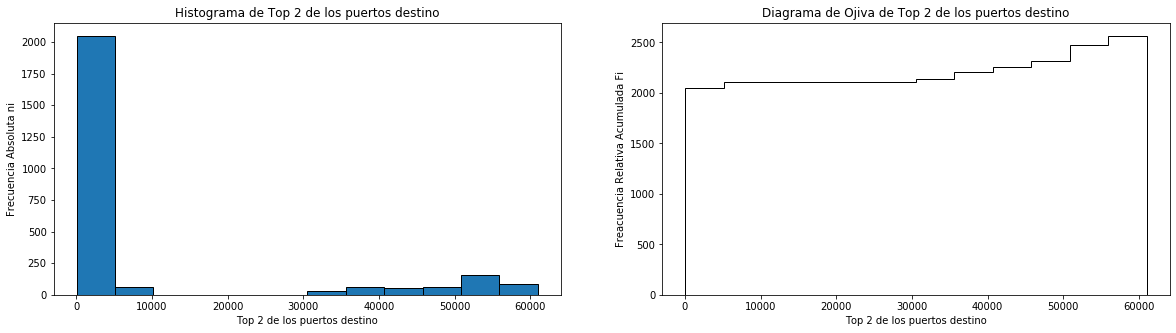

In [55]:
print(colored(f'Tabla de frecuencia de {name[9]}',attrs=['bold']))
print(tables_frequency[9])
hist_Ogive_plot(data_numeric_float_list[9],m,name[9])

Tabla de frecuencia de Percentil 1 entradas paquetes
   Percentil 1 entradas paquetes    ni           fi    Ni        Fi       Xí
0                (1.0, 34.83333)  4227     0.893091  4227  0.893091  17.9167
1           (34.83333, 68.66666)   169    0.0357067  4396  0.928798    51.75
2          (68.66666, 102.49999)     6   0.00126769  4402  0.930065  85.5833
3         (102.49999, 136.33332)     2  0.000422565  4404  0.930488  119.417
4         (136.33332, 170.16665)    50    0.0105641  4454  0.941052   153.25
5         (170.16665, 203.99998)    86    0.0181703  4540  0.959222  187.083
6         (203.99998, 237.83331)    23    0.0048595  4563  0.964082  220.917
7         (237.83331, 271.66664)    14   0.00295795  4577   0.96704   254.75
8         (271.66664, 305.49997)    17    0.0035918  4594  0.970632  288.583
9          (305.49997, 339.3333)    69    0.0145785  4663   0.98521  322.417
10         (339.3333, 373.16663)    67    0.0141559  4730  0.999366   356.25
11            (373.1666

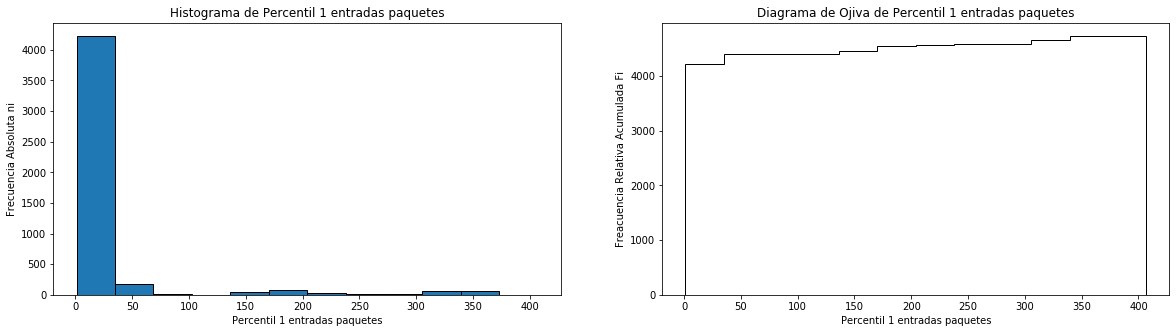

In [57]:
print(colored(f'Tabla de frecuencia de {name[10]}',attrs=['bold']))
print(tables_frequency[10])
hist_Ogive_plot(data_numeric_float_list[10],m,name[10])

Tabla de frecuencia de Percentil 3 entradas paquetes
   Percentil 3 entradas paquetes    ni          fi    Ni        Fi       Xí
0                (1.0, 34.83333)  3935    0.831397  3935  0.831397  17.9167
1           (34.83333, 68.66666)   398   0.0840904  4333  0.915487    51.75
2          (68.66666, 102.49999)    40   0.0084513  4373  0.923938  85.5833
3         (102.49999, 136.33332)    21  0.00443693  4394  0.928375  119.417
4         (136.33332, 170.16665)    18  0.00380308  4412  0.932178   153.25
5         (170.16665, 203.99998)   113   0.0238749  4525  0.956053  187.083
6         (203.99998, 237.83331)    30  0.00633847  4555  0.962392  220.917
7         (237.83331, 271.66664)    15  0.00316924  4570  0.965561   254.75
8         (271.66664, 305.49997)    16  0.00338052  4586  0.968941  288.583
9          (305.49997, 339.3333)    19  0.00401437  4605  0.972956  322.417
10         (339.3333, 373.16663)   107   0.0226072  4712  0.995563   356.25
11            (373.16663, 407.0)   

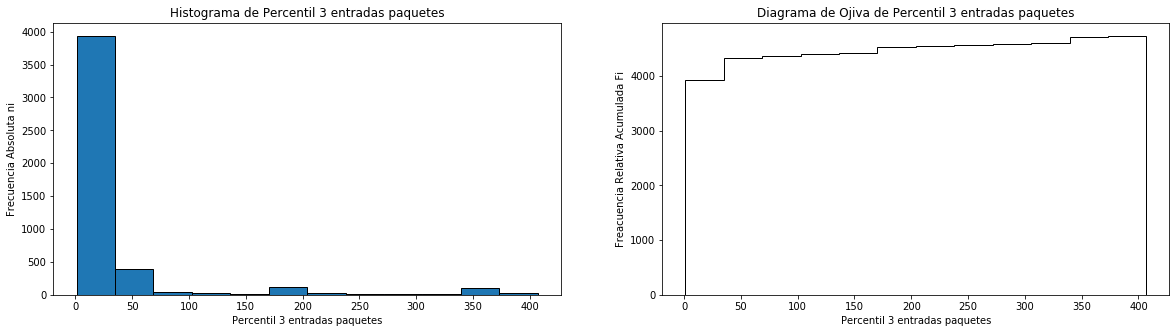

In [58]:
print(colored(f'Tabla de frecuencia de {name[12]}',attrs=['bold']))
print(tables_frequency[12])
hist_Ogive_plot(data_numeric_float_list[12],m,name[12])

Tabla de frecuencia de Percentil 1 entradas bytes
    Percentil 1 entradas bytes    ni           fi    Ni        Fi       Xí
0           (16.0, 7024.58333)  4211     0.889711  4211  0.889711  3520.29
1    (7024.58333, 14033.16666)   193    0.0407775  4404  0.930488  10528.9
2   (14033.16666, 21041.74999)   151    0.0319037  4555  0.962392  17537.5
3   (21041.74999, 28050.33332)    38   0.00802873  4593   0.97042    24546
4   (28050.33332, 35058.91665)   134    0.0283119  4727  0.998732  31554.6
5   (35058.91665, 42067.49998)     1  0.000211282  4728  0.998944  38563.2
6   (42067.49998, 49076.08331)     1  0.000211282  4729  0.999155  45571.8
7   (49076.08331, 56084.66664)     0            0  4729  0.999155  52580.4
8   (56084.66664, 63093.24997)     0            0  4729  0.999155    59589
9    (63093.24997, 70101.8333)     0            0  4729  0.999155  66597.5
10   (70101.8333, 77110.41663)     1  0.000211282  4730  0.999366  73606.1
11      (77110.41663, 84119.0)     3  0.000633847 

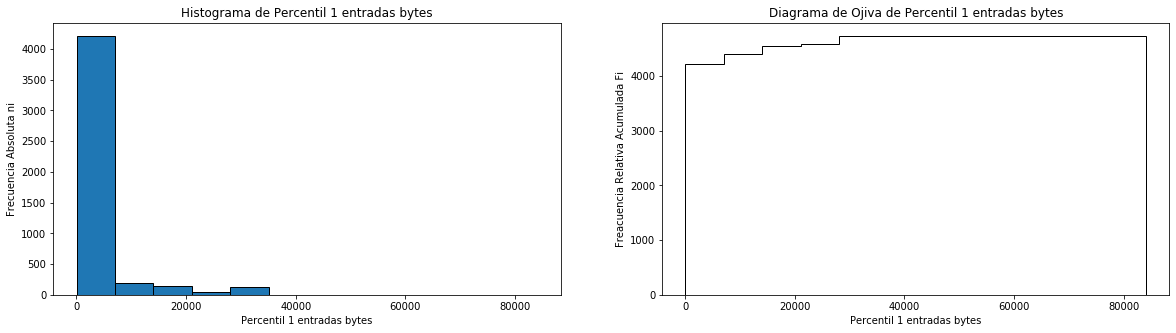

In [59]:
print(colored(f'Tabla de frecuencia de {name[13]}',attrs=['bold']))
print(tables_frequency[13])
hist_Ogive_plot(data_numeric_float_list[13],m,name[13])

Tabla de frecuencia de Percentil 2 entradas bytes
   Percentil 2 entradas bytes    ni           fi    Ni        Fi       Xí
0             (20.0, 7028.25)  3738     0.789774  3738  0.789774  3524.12
1          (7028.25, 14036.5)   524     0.110712  4262  0.900486  10532.4
2         (14036.5, 21044.75)   147    0.0310585  4409  0.931544  17540.6
3         (21044.75, 28053.0)   131     0.027678  4540  0.959222  24548.9
4         (28053.0, 35061.25)    27   0.00570463  4567  0.964927  31557.1
5         (35061.25, 42069.5)    26   0.00549334  4593   0.97042  38565.4
6         (42069.5, 49077.75)   115    0.0242975  4708  0.994718  45573.6
7         (49077.75, 56086.0)    21   0.00443693  4729  0.999155  52581.9
8         (56086.0, 63094.25)     0            0  4729  0.999155  59590.1
9         (63094.25, 70102.5)     0            0  4729  0.999155  66598.4
10        (70102.5, 77110.75)     1  0.000211282  4730  0.999366  73606.6
11        (77110.75, 84119.0)     3  0.000633847  4733        

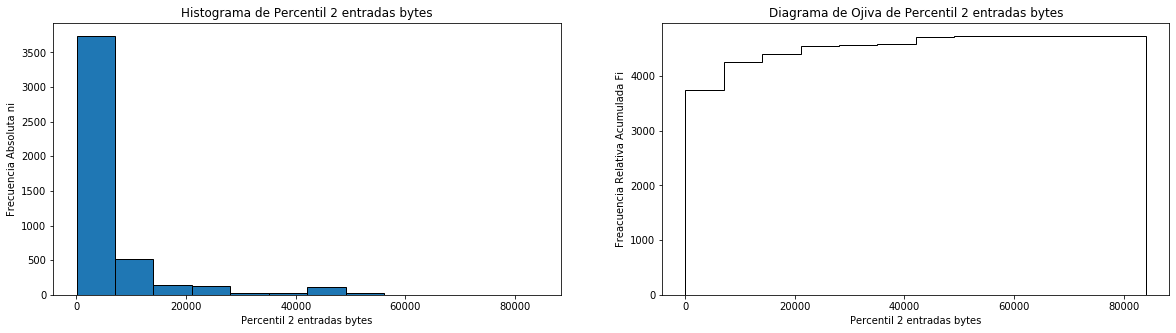

In [60]:
print(colored(f'Tabla de frecuencia de {name[14]}',attrs=['bold']))
print(tables_frequency[14])
hist_Ogive_plot(data_numeric_float_list[14],m,name[14])

Tabla de frecuencia de Percentil 3 entradas bytes
    Percentil 3 entradas bytes    ni           fi    Ni        Fi       Xí
0           (28.5, 7036.04167)  3340     0.705683  3340  0.705683  3532.27
1    (7036.04167, 14043.58334)   661     0.139658  4001  0.845341  10539.8
2   (14043.58334, 21051.12501)   276     0.058314  4277  0.903655  17547.4
3   (21051.12501, 28058.66668)   120    0.0253539  4397  0.929009  24554.9
4   (28058.66668, 35066.20835)   122    0.0257765  4519  0.954786  31562.4
5   (35066.20835, 42073.75002)    38   0.00802873  4557  0.962814    38570
6   (42073.75002, 49081.29169)    18   0.00380308  4575  0.966617  45577.5
7   (49081.29169, 56088.83336)    19   0.00401437  4594  0.970632  52585.1
8   (56088.83336, 63096.37503)    75    0.0158462  4669  0.986478  59592.6
9    (63096.37503, 70103.9167)    60    0.0126769  4729  0.999155  66600.1
10   (70103.9167, 77111.45837)     1  0.000211282  4730  0.999366  73607.7
11      (77111.45837, 84119.0)     3  0.000633847 

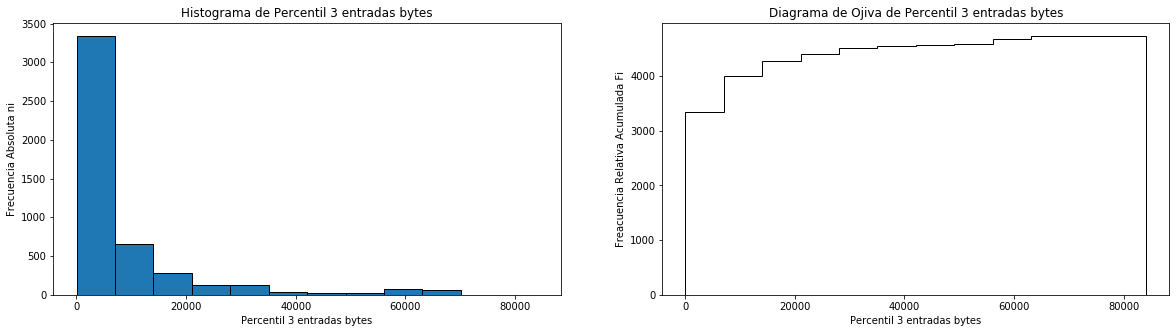

In [61]:
print(colored(f'Tabla de frecuencia de {name[15]}',attrs=['bold']))
print(tables_frequency[15])
hist_Ogive_plot(data_numeric_float_list[15],m,name[15])

# Discrete variables analysis (grouped data)

In [211]:
data_describe_n = data[data_numeric_int].describe()
data_describe_n = data_describe_n.T
data_describe_n['median'] = v_median
data_describe_n['median'] = v_mode
data_describe_n

,count,mean,std,min,25%,50%,75%,max,median
index,4206.0,6.381874e+02,5.614691e+02,0.0,175.00,446.0,955.75,2007.0,0
Netflows,4206.0,8.748716e+01,1.808184e+02,1.0,2.00,16.0,89.00,2873.0,2
#packets,4206.0,2.424252e+03,7.094414e+03,1.0,54.00,316.5,2197.00,198794.0,40
Avg_bps,4206.0,7.458727e+04,2.264702e+05,0.0,474.25,1258.0,58800.00,7161568.0,471
Avg_pps,4206.0,1.243652e+01,2.996790e+01,0.0,0.00,1.0,17.00,681.0,0
Avg_bpp,4206.0,3.634848e+02,2.906630e+02,0.0,133.00,298.5,532.00,1379.0,135
#Bytes,4206.0,1.843929e+06,7.103081e+06,33.0,14904.50,36616.0,980976.25,261143006.0,82
#sp,4206.0,3.251165e+01,5.836058e+01,1.0,2.00,2.0,41.00,711.0,2
#dp,4206.0,3.114242e+01,5.733890e+01,1.0,2.00,2.0,37.75,709.0,2
first_sp,4206.0,1.119724e+04,2.048053e+04,0.0,443.00,3332.0,4444.00,64790.0,443


# Outlier Data

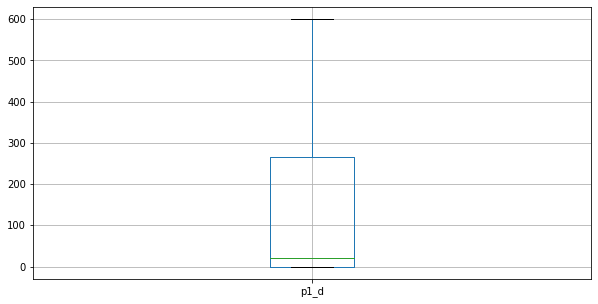

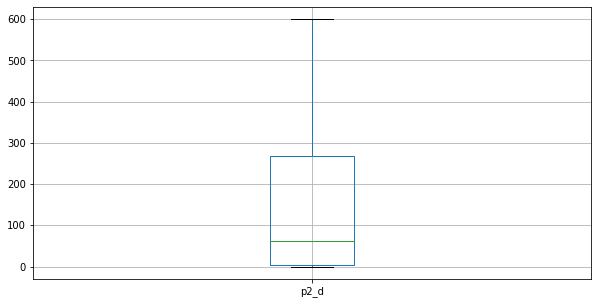

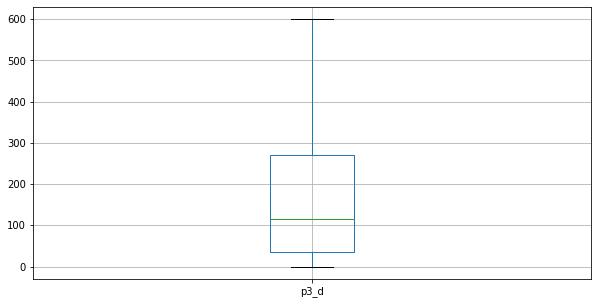

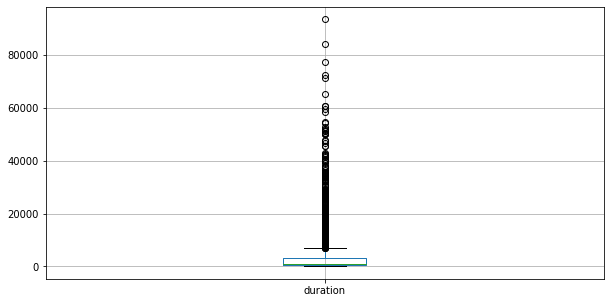

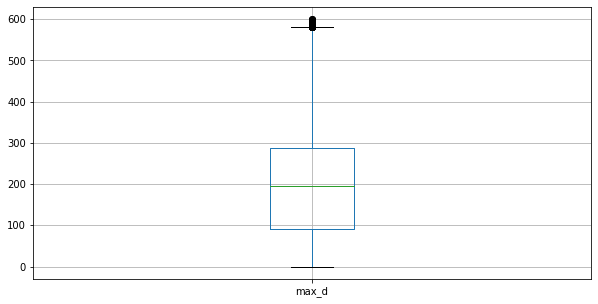

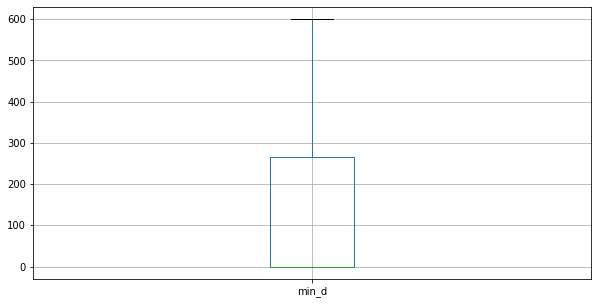

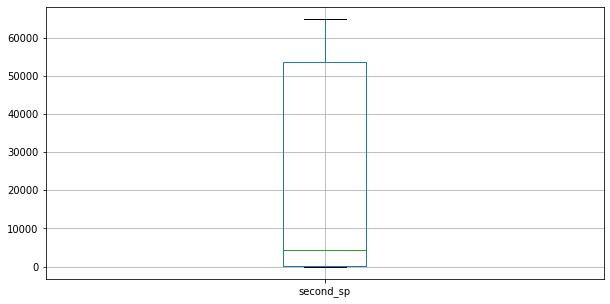

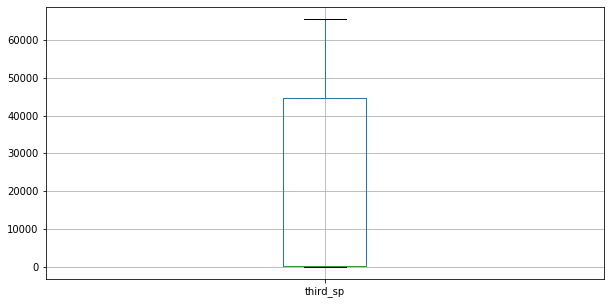

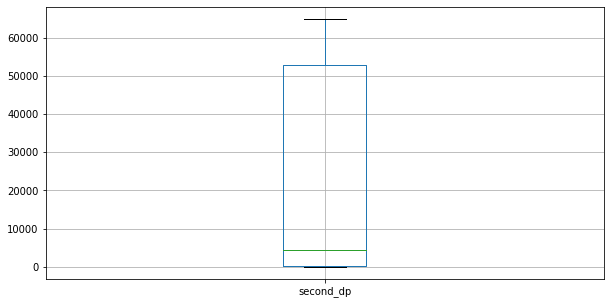

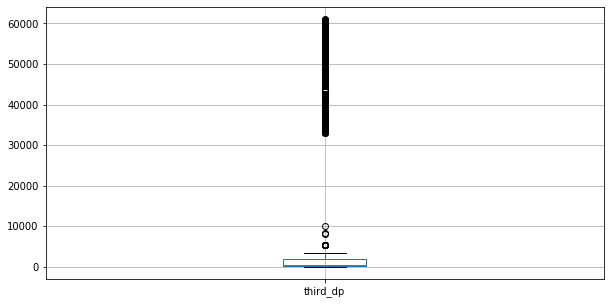

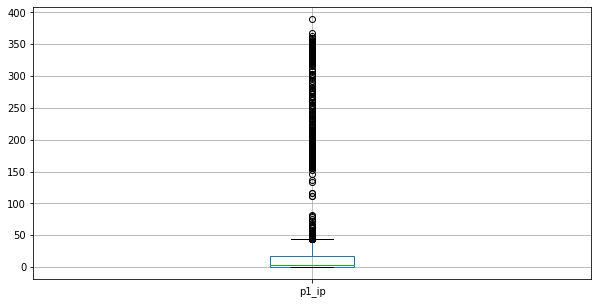

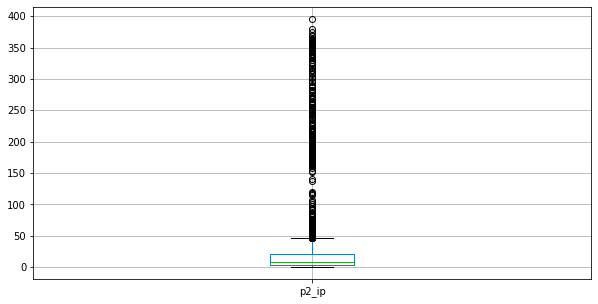

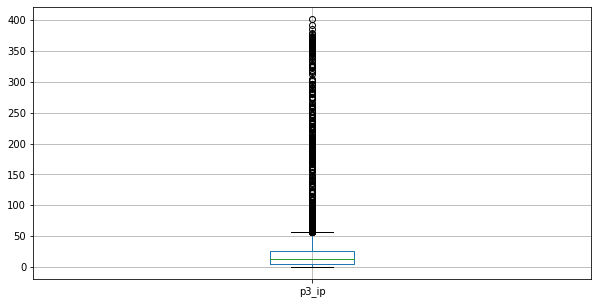

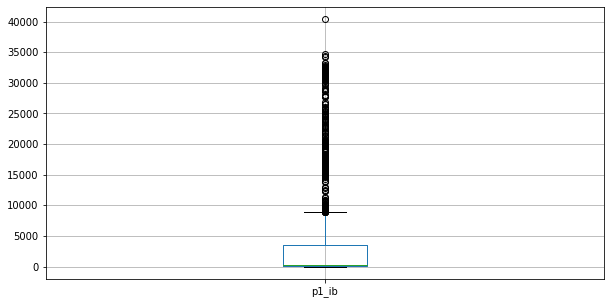

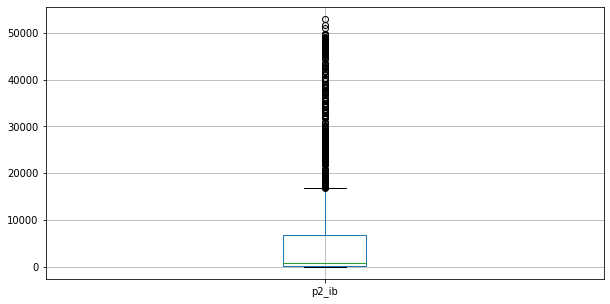

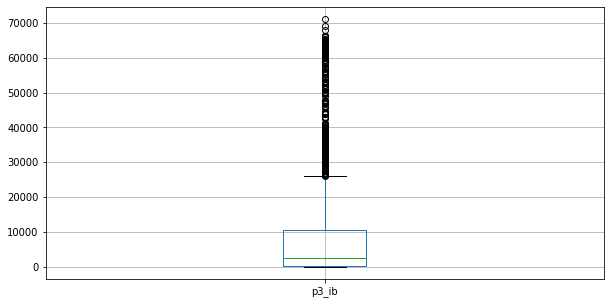

In [232]:
for i in data_numeric_float:
    outlier_data(i,data)

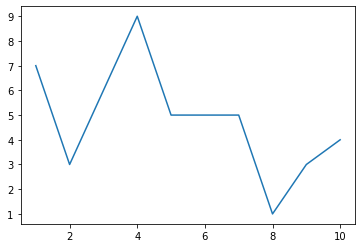

In [613]:
# %%
# Gráfico lineal
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 11)
y = np.random.randint(10, size=10)

plt.plot(x, y)
plt.show()

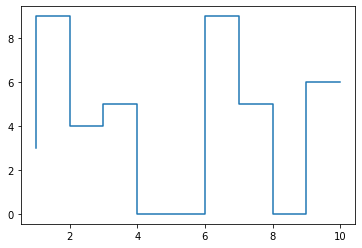

In [614]:
# %%
# Gráfico de escaleras
x = np.arange(1, 11)
y = np.random.randint(10, size=10)

plt.step(x, y)
plt.show()

In [615]:
data_numeric_int

['index',
 'Netflows',
 '#packets',
 'Avg_bps',
 'Avg_pps',
 'Avg_bpp',
 '#Bytes',
 '#sp',
 '#dp',
 'first_sp',
 'first_dp',
 'Id_Cryptocurrency']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


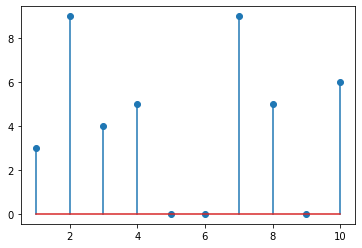

In [616]:
# %%
# Gráfico de líneas verticales
plt.stem(x, y)
plt.show()